<a href="https://colab.research.google.com/github/vedaareydeva/IMDB-Sentiment-Analysis/blob/main/IMDB_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow numpy pandas keras nltk

In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print(f"Training Samples: {len(x_train)}")
print(f"Test Samples: {len(x_test)}")
print(f"First training sample (encoded):{x_train[0]}")
print(f"First training label: {y_train[0]}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Samples: 25000
Test Samples: 25000
First training sample (encoded):[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 

In [3]:
word_index = imdb.get_word_index()
word_index = {k: (v + 3) for k,v in word_index.items() }

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3


In [5]:
reverse_word_index = {value: key for key, value in word_index.items()}

In [6]:
decoded_review = ' '.join([reverse_word_index.get(i, "<UNK>") for i in x_train[0]])

In [7]:
print(decoded_review)

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

In [8]:
print(f"Total training samples: {len(x_train)}")
print(f"Length of first review: {len(x_train[0])}")
print(f"Sample decoded review: \n{decoded_review}")

Total training samples: 25000
Length of first review: 218
Sample decoded review: 
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profi

In [9]:
import numpy as np
print(f"Average review length: {np.mean([len(x) for x in x_train])}")
print(f"Max review length: {np.max([len(x) for x in x_train])}")
print(f"Min review length: {np.min([len(x) for x in x_train])}")

Average review length: 238.71364
Max review length: 2494
Min review length: 11


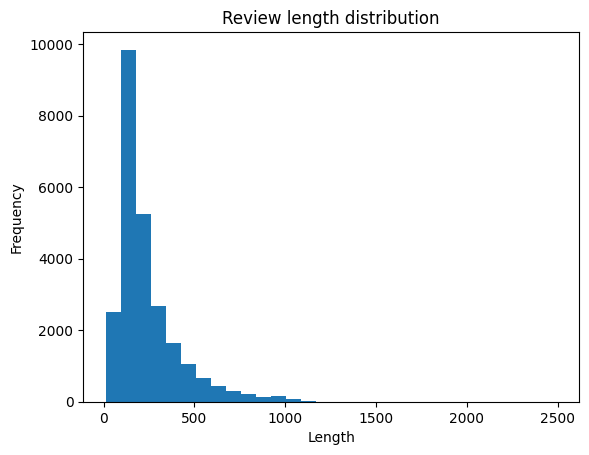

In [10]:
import matplotlib.pyplot as plt
review_lengths = [len(x) for x in x_train]
plt.hist(review_lengths, bins = 30)
plt.title("Review length distribution")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length =250
x_train = pad_sequences(x_train, maxlen=max_length, padding="post", truncating="post")
x_test = pad_sequences(x_test, maxlen=max_length, padding="post", truncating="post")

embedding layer and dense output

In [76]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D

vocab_size = 10000
embedding_dim = 16

from tensorflow.keras import regularizers

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.3),  # Increase dropout rate
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.build(input_shape=(None, max_length))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 250, 16)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_2           │ (None, 16)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,145 (625.57 KB)

 Trainable params: 160,145 (625.57 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Train model with class weights
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),
    verbose=1,
    class_weight=class_weights
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5716 - loss: 0.7233 - val_accuracy: 0.7563 - val_loss: 0.5980
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7746 - loss: 0.5635 - val_accuracy: 0.8319 - val_loss: 0.4716
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8352 - loss: 0.4584 - val_accuracy: 0.8581 - val_loss: 0.4209
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8544 - loss: 0.4126 - val_accuracy: 0.8580 - val_loss: 0.4008
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8683 - loss: 0.3836 - val_accuracy: 0.8687 - val_loss: 0.3769
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8814 - loss: 0.3575 - val_accuracy: 0.8696 - val_loss: 0.3663
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8865 - loss: 0.3395 - val_accuracy: 0.8731 - val_loss: 0.3552
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8885 - loss: 0.3244 - val_accurac

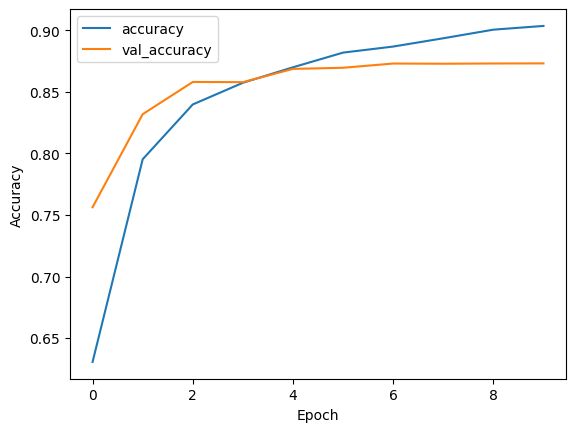

In [78]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

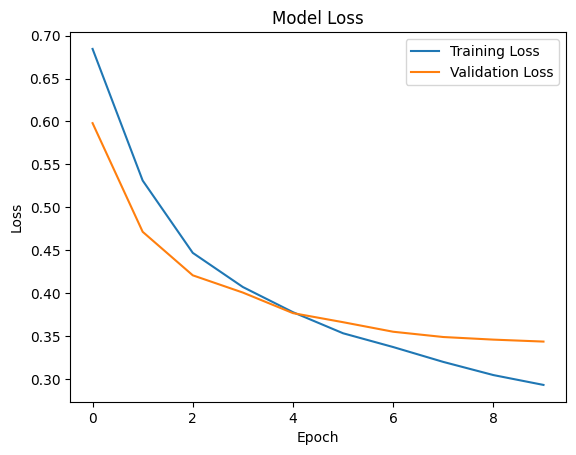

In [79]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [80]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.word_index = word_index  # Use the same word index as the IMDB dataset


In [81]:
sample_review = "This movie was amazing! The acting was fantastic and the plot was gripping."
# Preprocess (tokenize + pad) to match input format:
sample = tokenizer.texts_to_sequences([sample_review])
sample = pad_sequences(sample, maxlen=max_length, padding="post")

# Predict sentiment
prediction = model.predict(sample)[0][0]
sentiment = "Positive" if prediction > 0.4 else "Negative"
print(f"Sentiment: {sentiment} ({prediction:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Sentiment: Positive (0.81)


In [82]:
model.save('sentiment_model.h5')


In [87]:
sample_review = "This movie was so terribly nice"
# Preprocess (tokenize + pad) to match input format:
sample = tokenizer.texts_to_sequences([sample_review])
sample = pad_sequences(sample, maxlen=max_length, padding="post")

# Predict sentiment
prediction = model.predict(sample)[0][0]
sentiment = "Positive" if prediction > 0.5 else "Negative"
print(f"Sentiment: {sentiment} ({prediction:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Sentiment: Positive (0.59)
